# Hypotheses Testing

#### H0: There is no signification relationship between stimulus repetition and reactions times
#### H1: Repeated stimuli have faster/slower reaction times

If the above H0 is rejected, we can further test the hypothesis as:

#### H0: THere is no significant relationship between this effect and age. 
#### H1: THis effect increases/decreases with age.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import shapiro

##  Data Preparation

#### We first check if there is a relationship between reaction times and stimulus repetition. 

In [23]:
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [24]:
# Check for missing values
e1_learning.dropna(inplace=True)

# Convert infinite values to NaN
e1_learning.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
# Calculate summary statistics
summary_stats = e1_learning.groupby('stimulus_repetition')['rt'].describe()
print(summary_stats)

                       count        mean         std  min      25%     50%  \
stimulus_repetition                                                          
1                    13526.0  992.384437  395.659905  0.3  718.825  916.80   
2                     8130.0  912.398180  371.304472  0.5  659.700  826.30   
3                     8120.0  896.021047  370.219246  0.1  649.000  807.20   
4                     5416.0  852.924760  351.663504  0.1  623.475  763.75   
5                     5425.0  831.331650  351.898751  5.2  610.000  735.70   
6                     5415.0  808.706741  333.088636  0.6  597.000  720.10   

                          75%     max  
stimulus_repetition                    
1                    1178.850  3023.0  
2                    1077.775  2917.6  
3                    1048.700  2991.0  
4                     988.875  2998.0  
5                     952.700  2990.4  
6                     930.750  2996.0  


## Reaction time Vs Stimulus Repetition

#### Check normality of reaction times within each level of stimulus repetition

In [32]:
# Create separate data groups for each level of stimulus repetition
data_groups = {}
for repetition in range(1, 7):
    data_groups[repetition] = e1_learning[e1_learning['stimulus_repetition'] == repetition]['rt']


In [38]:
def check_normality(data, group_name, sample_size=1000):
    sample_data = np.random.choice(data.dropna(), sample_size, replace=False)
    stat, p = shapiro(sample_data)
    print(f"Shapiro-Wilk test for normality in {group_name}:")
    print(f"   Test Statistic: {stat:.3f}")
    print(f"   p-value: {p:.10f}")
    
# Check normality for each group with sampling
for repetition, data_group in data_groups.items():
    group_name = f"Group {repetition}"
    check_normality(data_group, group_name)


Shapiro-Wilk test for normality in Group 1:
   Test Statistic: 0.945
   p-value: 0.0000000000
Shapiro-Wilk test for normality in Group 2:
   Test Statistic: 0.898
   p-value: 0.0000000000
Shapiro-Wilk test for normality in Group 3:
   Test Statistic: 0.866
   p-value: 0.0000000000
Shapiro-Wilk test for normality in Group 4:
   Test Statistic: 0.870
   p-value: 0.0000000000
Shapiro-Wilk test for normality in Group 5:
   Test Statistic: 0.834
   p-value: 0.0000000000
Shapiro-Wilk test for normality in Group 6:
   Test Statistic: 0.832
   p-value: 0.0000000000


The p-value is consistently 0 even after sampling, it could be due to the following reasons:

Sample size: Even after sampling the data, the sample size may still be too large to accurately estimate the p-value, especially if the underlying distribution deviates significantly from normality.

Presence of outliers: Outliers in the data can affect the results of the Shapiro-Wilk test, especially in large sample sizes.

Non-normality: It's also possible that the data is genuinely non-normal.

Hence, we use non-parametric tests.

#### Levene's test for homogeneity of variances

In [41]:
from scipy.stats import levene

statistic, p_value = levene(*data_groups.values())

print("Levene's test for homogeneity of variances:")
print(f"   Test Statistic: {statistic:.3f}")
print(f"   p-value: {p_value:.10f}")

Levene's test for homogeneity of variances:
   Test Statistic: 62.450
   p-value: 0.0000000000


The p-value indicates the probability of observing the test statistic (or a more extreme value) if the null hypothesis is true. In this case, a p-value of 0 means that the observed test statistic is very unlikely to have occurred under the assumption that the variances of the groups are equal.

Since Levene's test assumption of homogeneity of variances is violated, we consider using a non-parametric alternative to compare the groups. 

One such alternative is the Kruskal-Wallis test, which is a non-parametric equivalent of the one-way ANOVA test.

#### Kruskal-Wallis test

In [46]:
from scipy.stats import kruskal, mannwhitneyu

# Perform Kruskal-Wallis test
kruskal_statistic, kruskal_p_value = kruskal(*[group.dropna() for group in data_groups.values()])
print("Kruskal-Wallis Test:")
print(f"   Test Statistic: {kruskal_statistic:.3f}")
print(f"   p-value: {kruskal_p_value:.10f}")


Kruskal-Wallis Test:
   Test Statistic: 1967.036
   p-value: 0.0000000000


#### Post Hoc tests

In [50]:
import scikit_posthocs as sp

# Dunn's test for multiple comparisons
kw_result = sp.posthoc_dunn(e1_learning, val_col='rt', group_col='stimulus_repetition', p_adjust='bonferroni')

print("Pairwise Comparison Results:")
print(kw_result)

Pairwise Comparison Results:
               1             2             3              4              5  \
1   1.000000e+00  3.190136e-64  5.232761e-94  1.787380e-155  5.366751e-225   
2   3.190136e-64  1.000000e+00  1.758059e-02   6.308620e-26   8.730271e-55   
3   5.232761e-94  1.758059e-02  1.000000e+00   5.052444e-14   1.246689e-36   
4  1.787380e-155  6.308620e-26  5.052444e-14   1.000000e+00   8.473233e-05   
5  5.366751e-225  8.730271e-55  1.246689e-36   8.473233e-05   1.000000e+00   
6  2.252497e-279  1.467314e-80  3.792086e-58   3.302507e-13   2.878206e-02   

               6  
1  2.252497e-279  
2   1.467314e-80  
3   3.792086e-58  
4   3.302507e-13  
5   2.878206e-02  
6   1.000000e+00  


This non-parametric test is a post hoc test used after Kruskal-Wallis test to determine which groups differ significantly from each other.

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD
tukey_results = pairwise_tukeyhsd(e1_learning['rt'], e1_learning['stimulus_repetition'], alpha=0.05)
tukey_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-79.9863,0.0,-94.7739,-65.1986,True
1,3,-96.3634,0.0,-111.1567,-81.5701,True
1,4,-139.4597,0.0,-156.4042,-122.5152,True
1,5,-161.0528,0.0,-177.9872,-144.1183,True
1,6,-183.6777,0.0,-200.6233,-166.7321,True
2,3,-16.3771,0.0539,-32.9098,0.1555,False
2,4,-59.4734,0.0,-77.9559,-40.9909,True
2,5,-81.0665,0.0,-99.5398,-62.5932,True
2,6,-103.6914,0.0,-122.175,-85.2079,True
3,4,-43.0963,0.0,-61.5833,-24.6092,True


#### Visualisation

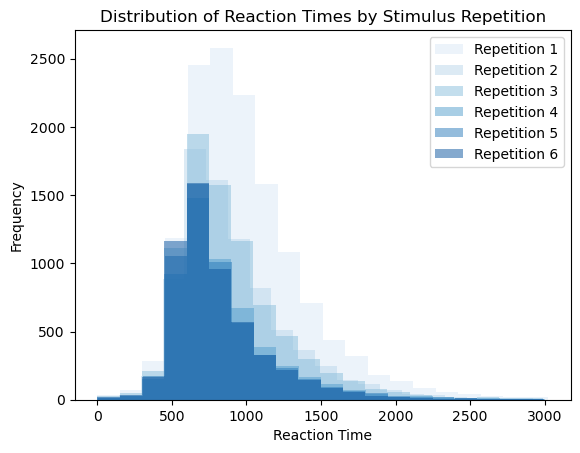

In [75]:
# Plot the distribution of reaction times for each level of stimulus repetition
for repetition, group in e1_learning.groupby('stimulus_repetition'):
    plt.hist(group['rt'], bins=20, alpha=0.5, label=f"Repetition {repetition}")

plt.xlabel("Reaction Time")
plt.ylabel("Frequency")
plt.title("Distribution of Reaction Times by Stimulus Repetition")
plt.legend()
plt.show()

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


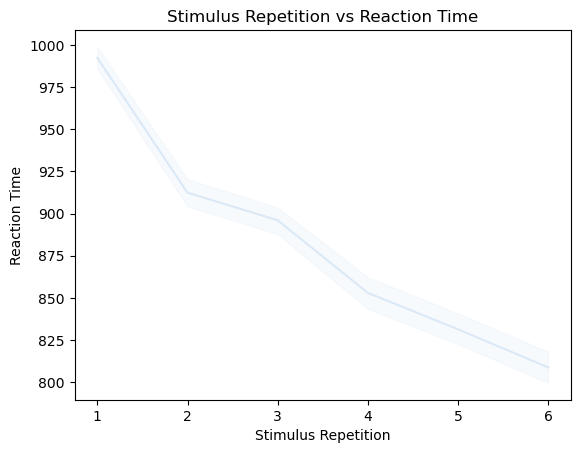

In [74]:
sns.lineplot(data=e1_learning, x='stimulus_repetition', y='rt')
plt.title("Stimulus Repetition vs Reaction Time")
plt.xlabel("Stimulus Repetition")
plt.ylabel("Reaction Time")
plt.show()

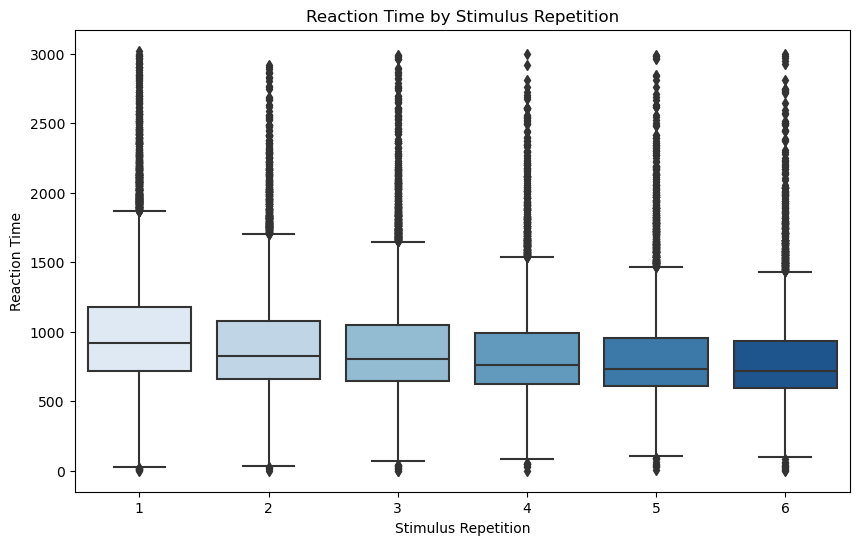

In [73]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stimulus_repetition', y='rt', data=e1_learning)
plt.title('Reaction Time by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Reaction Time')
plt.show()


/tmp/ipykernel_26498/2707167054.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='stimulus_repetition', y='rt', data=e1_learning, ci='sd')


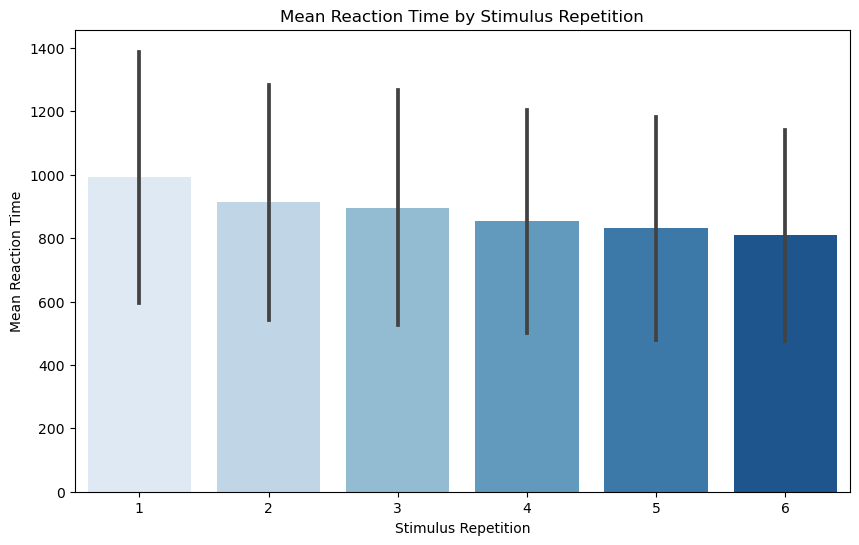

In [72]:
# Bar plot
sns.set_palette('Blues')
plt.figure(figsize=(10, 6))
sns.barplot(x='stimulus_repetition', y='rt', data=e1_learning, ci='sd')
plt.title('Mean Reaction Time by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Mean Reaction Time')
plt.show()

#### Inferences

- The results indicate that there is a significant relationship between stimulus repetition and reaction times. Specifically, the Kruskal-Wallis test showed a significant difference in reaction times across different levels of stimulus repetition (p < 0.05). Post-hoc tests, such as Tukey's HSD, revealed significant differences in reaction times between pairs of stimulus repetition levels. This suggests that the repetition of stimuli indeed influences reaction times.

- Additionally, it's important to note that the p-value obtained from the Kruskal-Wallis test was very small (p < 0.001), indicating strong evidence against the null hypothesis. This suggests that the observed differences in reaction times across stimulus repetition levels are unlikely to be due to random chance alone.

Therefore, based on the results, we reject the null hypothesis (H0) and conclude that there is a significant relationship between stimulus repetition and reaction times. Furthermore, reaction time decreases as stimulus is repeated. 

Now we will perform a regression analysis to examine the relationship between stimulus repetition, reaction times, and age. 

## Relationship between memory performance and stimulus repetition

#### Data processing

In [122]:
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv") 
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")

# Merge dataframes
memory_merged = pd.merge(e1_memory, e1_sub_ages, on='subject_id')

In [123]:
memory_merged.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay,age
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0,8.04
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0,8.04
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0,8.04
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0,8.04
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0,8.04


In [124]:
print("\nMissing values in memory data:")
print(memory_merged.isnull().sum())

memory_merged.dropna(inplace=True)


Missing values in memory data:
subject_id                  0
task_part                   0
block_order                 0
block_condition             0
category_type               0
num_stim_rep            15504
image                       0
category                    0
task_block                  0
stim_num                    0
correct_mem_response        0
mem_response               28
confidence                 28
rt                         28
mem_acc                    28
conf_number                28
conf_rating                28
foil_type                   0
memory_delay              192
age                         0
dtype: int64


### ROC Curve Analysis

In [128]:
from sklearn.metrics import roc_curve, auc

# Construct ROC curves and compute AUC for each combination of stimulus repetitions
def calculate_roc_auc(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc


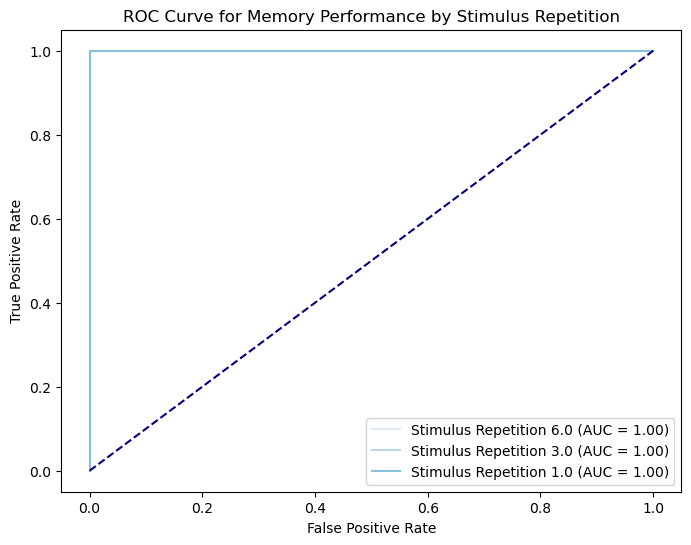

In [129]:

stimulus_repetitions = memory_merged['num_stim_rep'].unique()
plt.figure(figsize=(8, 6))
for repetition in stimulus_repetitions:
    subset_data = memory_merged[memory_merged['num_stim_rep'] == repetition]
    fpr, tpr, roc_auc = calculate_roc_auc(subset_data['mem_acc'], subset_data['mem_acc']) 
    plt.plot(fpr, tpr, label=f"Stimulus Repetition {repetition} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Memory Performance by Stimulus Repetition')
plt.legend(loc="lower right")
plt.show()


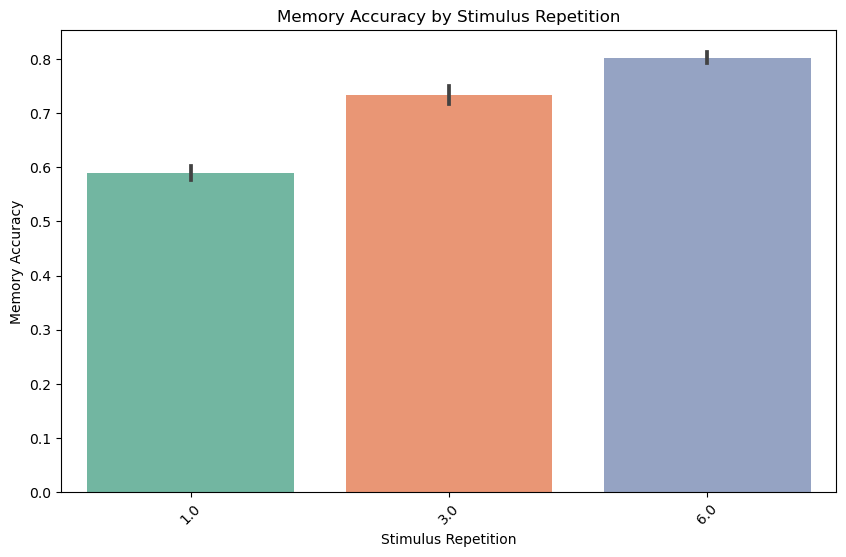

In [130]:
# Bar plot of memory accuracy by stimulus repetition
plt.figure(figsize=(10, 6))
sns.barplot(x='num_stim_rep', y='mem_acc', data=memory_merged, palette='Set2')
plt.title('Memory Accuracy by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Memory Accuracy')
plt.xticks(rotation=45)
plt.show()


#### chi-squared test to examine the association between mem_acc and num_stim_rep:

In [131]:
from scipy.stats import chi2_contingency

memory_data_subset = memory_merged[['mem_acc', 'num_stim_rep']]

# Create a contingency table
contingency_table = pd.crosstab(memory_data_subset['mem_acc'], memory_data_subset['num_stim_rep'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-squared Test Statistic: 602.4456654581097
P-value: 1.5156046271381155e-131


The p-value is extremely small (close to zero), suggesting strong evidence showing that there exists a relationship between memory accuracy and stimulus repetition. 

Now we see how this effect changes with age.

## Relationship between stimulus repetition, reaction times, and age

In [132]:
selected_data = memory_merged[['age', 'num_stim_rep', 'rt']]

#### Correlation test

In [136]:
correlation_results = {}
for repetition in selected_data['num_stim_rep'].unique():
    subset_data = selected_data[selected_data['num_stim_rep'] == repetition]
    correlation = subset_data[['age', 'rt']].corr().iloc[0, 1]
    correlation_results[repetition] = correlation


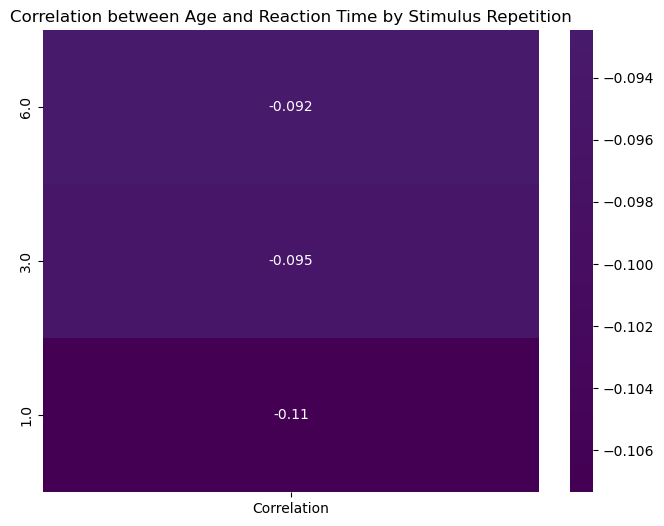

In [137]:
# heatmap
correlation_matrix = pd.DataFrame(correlation_results, index=['Correlation']).T
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation between Age and Reaction Time by Stimulus Repetition')
plt.show()


#### Regression Analysis

In [165]:

regression_results = {}
for repetition in selected_data['num_stim_rep'].unique():
    subset_data = selected_data[selected_data['num_stim_rep'] == repetition]
    X = subset_data[['age']]
    y = subset_data['rt']
    model = sm.OLS(y, sm.add_constant(X)).fit()
    regression_results[repetition] = model

# Summary of regression results
for repetition, model in regression_results.items():
    print(f"Regression Results for Stimulus Repetition {repetition}:")
    print(model.summary())
             

Regression Results for Stimulus Repetition 6.0:
                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     46.82
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           8.65e-12
Time:                        19:37:33   Log-Likelihood:                -43531.
No. Observations:                5430   AIC:                         8.707e+04
Df Residuals:                    5428   BIC:                         8.708e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

#### ANOVA

In [150]:
anova_results = {}
for repetition in selected_data['num_stim_rep'].unique():
    subset_data = selected_data[selected_data['num_stim_rep'] == repetition]
    age_groups = subset_data['age'].unique()
    anova_data = [subset_data[subset_data['age'] == age]['rt'].values for age in age_groups]
    f_statistic, p_value = stats.f_oneway(*anova_data)
    anova_results[repetition] = {'F-statistic': f_statistic, 'p-value': p_value}

# Print ANOVA results
for repetition, results in anova_results.items():
    print(f"ANOVA Results for Stimulus Repetition {repetition}:")
    print(f"   F-statistic: {results['F-statistic']:.3f}")


ANOVA Results for Stimulus Repetition 6.0:
   F-statistic: 8.434
ANOVA Results for Stimulus Repetition 3.0:
   F-statistic: 5.910
ANOVA Results for Stimulus Repetition 1.0:
   F-statistic: 9.880


The F-statistic values (8.434, 5.910, and 9.880) represent the calculated F-statistics for the corresponding levels of stimulus repetition. These values indicate the strength of evidence against the null hypothesis that the means of the groups are equal. It suggests rejecting the null hypothesis in favor of the alternative hypothesis that at least one of the group means is different from the others.

#### Visualisations

<Figure size 1000x800 with 0 Axes>

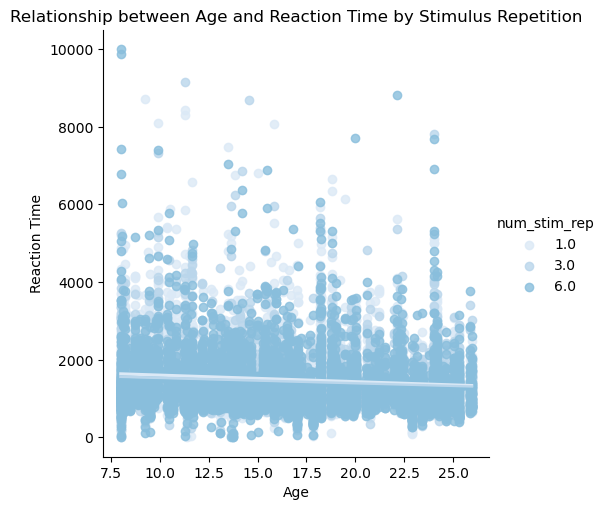

In [162]:
# Scatter plots of reaction time against age for each level of stimulus repetition
plt.figure(figsize=(10, 8))
sns.lmplot(x='age', y='rt', hue='num_stim_rep', data=memory_merged)
plt.title('Relationship between Age and Reaction Time by Stimulus Repetition')
plt.xlabel('Age')
plt.ylabel('Reaction Time')
plt.show()

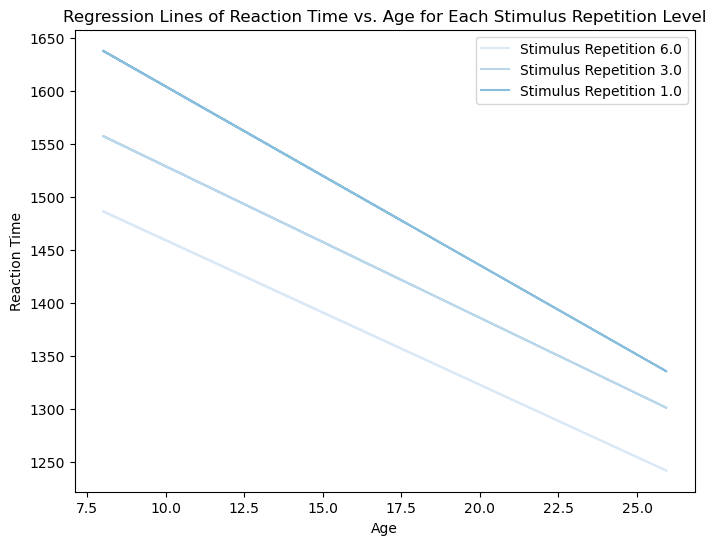

In [163]:
plt.figure(figsize=(8, 6))
for repetition, model in regression_results.items():
    plt.plot(selected_data[selected_data['num_stim_rep'] == repetition]['age'], model.predict(), label=f"Stimulus Repetition {repetition}")
plt.xlabel('Age')
plt.ylabel('Reaction Time')
plt.title('Regression Lines of Reaction Time vs. Age for Each Stimulus Repetition Level')
plt.legend()
plt.show()

## Visualisation

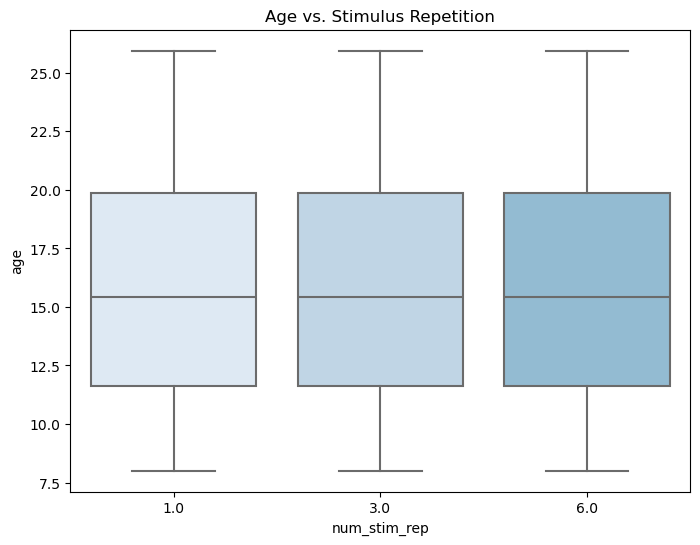

In [118]:
# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_stim_rep', y='age', data=memory_merged)
plt.title('Age vs. Stimulus Repetition')
plt.show()


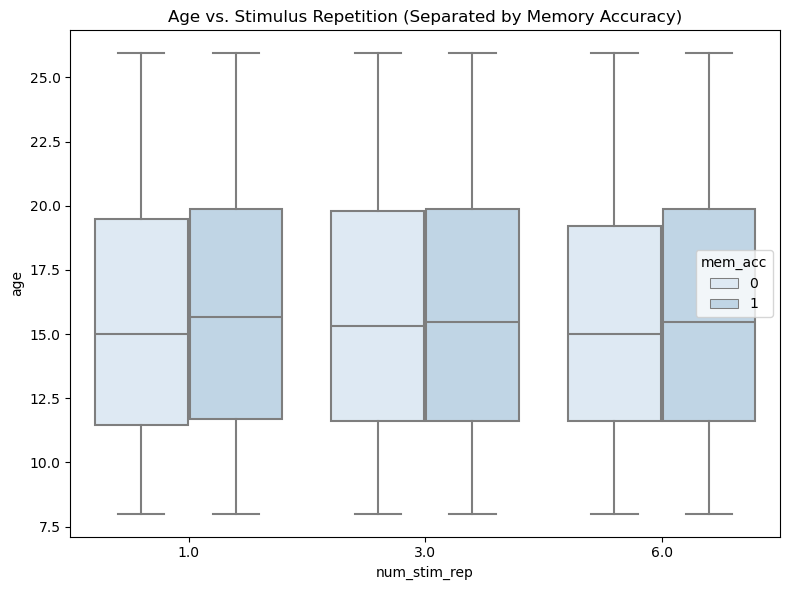

In [120]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='num_stim_rep', y='age', hue='mem_acc', data=memory_merged)
plt.title('Age vs. Stimulus Repetition (Separated by Memory Accuracy)')
plt.tight_layout()
plt.show()

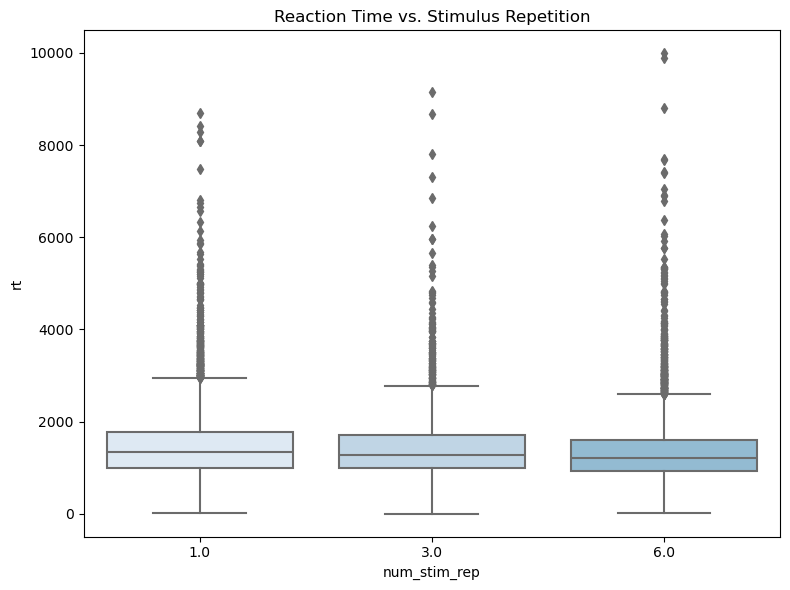

In [121]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='num_stim_rep', y='rt', data=memory_merged)
plt.title('Reaction Time vs. Stimulus Repetition')
plt.tight_layout()
plt.show()
